In [1]:
import numpy as np               # Import numpy 
import matplotlib.pyplot as plt  # Import matplotlib
%matplotlib inline

In [2]:
def cic_decim(x, R, N):
    """
    
    Cascaded Integrator-Comb (CIC) filter is an optimized class of 
    finite impulse response (FIR) filter. 
    CIC filter combines an interpolator or decimator, so it has some
    parameters:

    R - decimation or interpolation ratio,
    N - number of stages in filter (or filter order)
    M - number of samples per stage (1 or 2)*

    * for this realisation of CIC filter just leave M = 1.

    CIC filter is used in multi-rate processing. In hardware 
    applications CIC filter doesn't need multipliers, just only 
    adders / subtractors and delay lines.

    Equation for 1st order CIC filter:
    y[n] = x[n] - x[n-RM] + y[n-1].

    Parameters
    ----------
    x : np.array
        input signal
    R : int
        decimation rate
    N : int
        filter order
    """
    
    # integrator
    for i in range(N):
        x = np.cumsum(x)
    # decimator
    x = x[::R]
    # comb stage
    x = np.diff(x, n=N)
    return x

In [3]:
def cic_interp(x, R, N):
    """

    Parameters
    ----------
    x : np.array
        input signal
    R : int
        interpolation rate
    N : int
        filter order
    """
    # comb stage
    x = np.diff(x, n=N)
    
    # interpolation
    y = []
    for i in x:
        y.append(i)
        for j in range(R):
            y.append(0)
#     x = np.repeat(x, R)
    # integrator
    for i in range(N):
        y = np.cumsum(y)
        y /= R
    return y

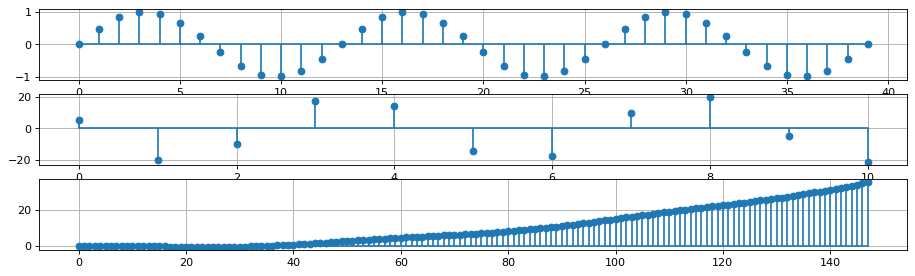

In [4]:
N = 40
M = 3
t = np.linspace(0, 1, N)
a = np.sin(2*np.pi*3*t)

y = cic_decim(a, M, 3)
z = cic_interp(a, M, 3)

plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(3,1,1)
plt.stem(a, use_line_collection=True, basefmt='C0')
plt.grid()
plt.subplot(3,1,2)
plt.stem(y, use_line_collection=True, basefmt='C0')
plt.grid()
plt.subplot(3,1,3)
plt.stem(z, use_line_collection=True, basefmt='C0')
plt.grid()
